# Baseline: Moving Average as a Prediction

In this notebook, we define a benchmark to compare all future modeling results against. We'll simply use a three-day moving average of fantasy performance to predict the next game for each of our players. This is a classic and simple time series technique that more advanced modeling solutions should be able to outperform.

#### Setup

In [1]:
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error

plt.style.use('ggplot')

In [8]:
def get_naive_predictions(df, split_date, player_name):
    df_cp = df.copy()
    df_cp['pred'] = df_cp['target'].rolling(3).mean().shift()
    df_cp['date'] = pd.to_datetime(df_cp['date'])
    df_cp = df_cp.loc[df_cp['player_played']!=0]
    
    preds = df_cp.loc[df_cp['date']>split_date]['pred'].values
    y_test = df_cp.loc[df_cp['date']>split_date]['target'].values
    
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    mae = mean_absolute_error(y_test, preds)
    print('{}'.format(player_name))
    print("RMSE: {:.2f}\n MAE: {:.2f}".format(rmse, mae))
    
    fig, ax = plt.subplots()
    plot1 = ax.plot(y_test, alpha = 0.8, label='actual')
    plot2 = ax.plot(preds, alpha = 0.8, label='predicted')
    ax.legend()
    plt.xlabel('Game Number')
    plt.ylabel('Fantasy Points')
    plt.title('{} Fantasy Points 2012, Predicted vs Actual'.format(player_name))
    plt.show()

#### Tom Brady

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  import sys
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  


Tom Brady
RMSE: 7.51
 MAE: 6.33


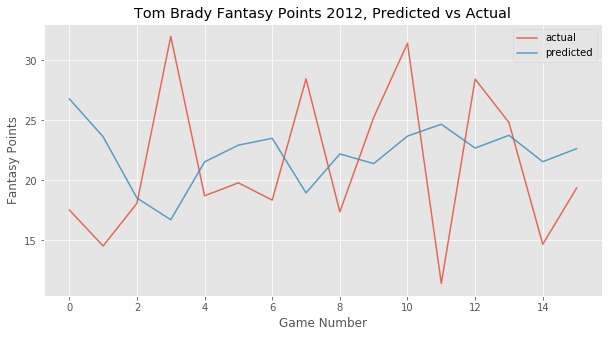

In [9]:
plt.rcParams['figure.figsize'] = (10, 5)
split_date = dt.date(2012,5,1)
brady = pd.read_csv('../data/data_final/final/features_raw/brady.csv')

get_naive_predictions(brady, split_date, 'Tom Brady')

#### LeSean McCoy

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  import sys
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  


LeSean McCoy
RMSE: 3.19
 MAE: 2.65


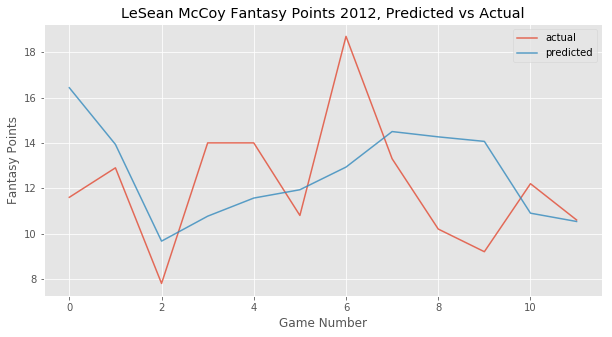

In [10]:
mccoy =  pd.read_csv('../data/data_final/final/features_raw/mccoy.csv')
mccoy = mccoy.loc[mccoy['target']!=0]

x=get_naive_predictions(mccoy, split_date, 'LeSean McCoy')